544.874858751


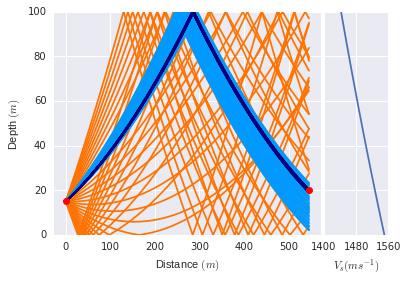

In [55]:
from bounos.ChartBuilders.ssp import UUV_time_delay, ssp_function, SSPS
%matplotlib inline
from matplotlib import pylab as plt
depth = 100
r=UUV_time_delay(SSP='n_squared', graph=1, depth=depth, dist_calc=False, 
                     pdf_plot={'filepath':'/dev/shm/test'})

544.874858751


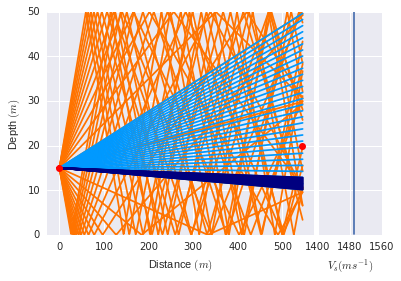

544.874858751


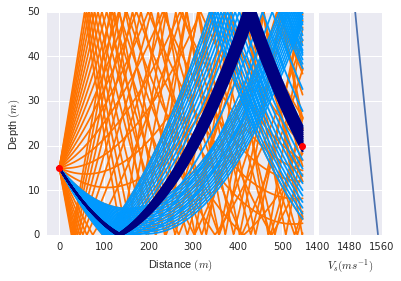

544.874858751


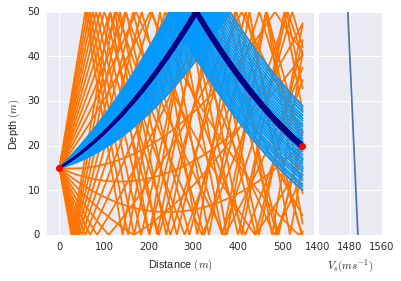

544.874858751


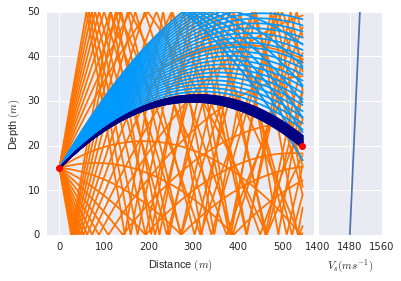

In [10]:
fs = {}
for SSP in SSPS:

    r=UUV_time_delay(SSP=SSP, graph=1, depth=depth, dist_calc=False, 
                     pdf_plot={'filepath':'/dev/shm/test'})


In [ ]:
f,ax=fs['n_squared']

In [ ]:
ax.set_xlabel("Distance")
ax.set_ylabel("Depth")

In [ ]:
f,ax = plt.subplots()

In [15]:
import scipy.io as sio
svp = sio.loadmat('/home/bolster/src/aietes/data/lev_ann.mat')['c']

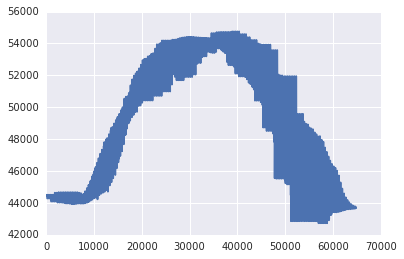

In [20]:
plt.plot(svp[:,0])

In [21]:
import netCDF4

In [25]:
netCDF4.Dataset('/home/bolster/Downloads/woa09/temperature_annual_1deg.nc')

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    dimensions(sizes): lon(360), lat(180), depth(33), time(1), nv(2)
    variables(dimensions): float32 depth(depth), float32 t_an(time,depth,lat,lon)
    groups: 

In [28]:
sp=netCDF4.Dataset('/home/bolster/Downloads/dbs/ssp/2WOA2009_SSP_Annual.nc').variables['ssp']

In [31]:
import xray

In [34]:
df = xray.open_dataset('/home/bolster/Downloads/dbs/ssp/2WOA2009_SSP_Annual.nc').to_dataframe()

In [50]:
df.xs(0,level='depth')

ssp
latitude longitude             
 89.5    -179.5     1436.697876
         -178.5     1436.751465
         -177.5     1436.807373
         -176.5     1436.848145
         -175.5     1436.879639
         -174.5     1436.891968
         -173.5     1436.899414
         -172.5     1436.902100
         -171.5     1436.901123
         -170.5     1436.897095
         -169.5     1436.898438
         -168.5     1436.901978
         -167.5     1436.951538
         -166.5     1436.995117
         -165.5     1437.051880
         -164.5     1437.071655
         -163.5     1437.076172
         -162.5     1437.061035
         -161.5     1437.017944
         -160.5     1436.964478
         -159.5     1436.879883
         -158.5     1436.789185
         -157.5     1436.698486
         -156.5     1436.613892
         -155.5     1436.550293
         -154.5     1436.502075
         -153.5     1436.468262
         -152.5     1436.437866
         -151.5     1436.405762
         -150.5     1436.391113
...                         ...
-89.5     150.5        0.000000
          151.5        0.000000
          152.5        0.000000
          153.5        0.000000
          154.5        0.000000
          155.5        0.000000
          156.5        0.000000
          157.5        0.000000
          158.5        0.000000
          159.5        0.000000
          160.5        0.000000
          161.5        0.000000
          162.5        0.000000
          163.5        0.000000
          164.5        0.000000
          165.5        0.000000
          166.5        0.000000
          167.5        0.000000
          168.5        0.000000
          169.5        0.000000
          170.5        0.000000
          171.5        0.000000
          172.5        0.000000
          173.5        0.000000
          174.5        0.000000
          175.5        0.000000
          176.5        0.000000
          177.5        0.000000
          178.5        0.000000
          179.5        0.000000

[64800 rows x 1 columns]

In [12]:
shared_h5_path = '/dev/shm/shared.h5'
results_path = "/home/bolster/src/aietes/results/Malicious Behaviour Trust Comparison-2015-07-20-17-47-53"
import pandas as pd
with pd.get_store(shared_h5_path) as store:
    joined = store.get('joined_target_weights_signed')
    
with pd.get_store(results_path + '.h5') as store:
    trust_observations = store.trust.dropna()
    v=list(trust_observations.index.levels[2])

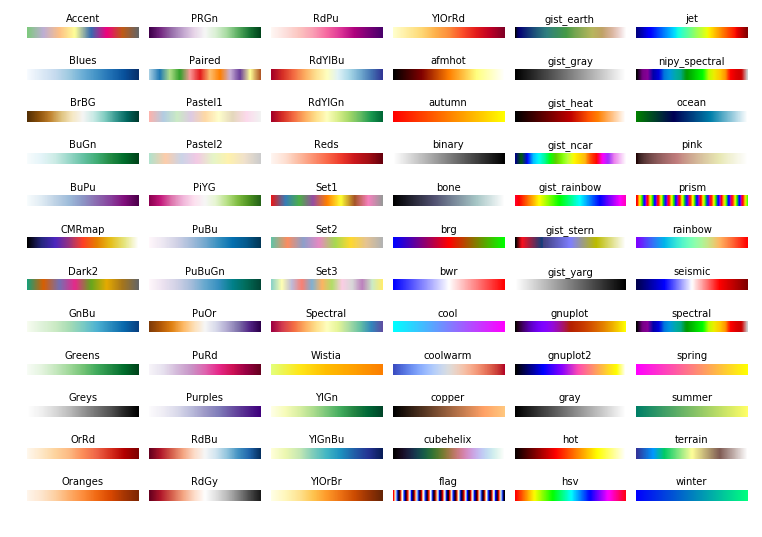

In [18]:
import matplotlib.pylab as plt
fig, axes = plt.subplots(36, 6, figsize=(10, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                    hspace=0.1, wspace=0.1)

im = np.outer(np.ones(10), np.arange(100))

cmaps = [m for m in plt.cm.datad if not m.endswith("_r")]
cmaps.sort()

axes = axes.T.ravel()
for ax in axes:
    ax.axis('off')

for cmap, color_ax, gray_ax, null_ax in zip(cmaps, axes[1::3], axes[2::3], axes[::3]):
    del null_ax
    color_ax.set_title(cmap, fontsize=10)
    color_ax.imshow(im, cmap=cmap)
    #gray_ax.imshow(im, cmap=grayify_cmap(cmap))

In [17]:
%matplotlib inline

In [22]:
import palettable.colorbrewer.qualitative as cmap_qual
cmap_qual.get('Dark2_8'])

SyntaxError: invalid syntax (<ipython-input-22-0a401fc59fd5>, line 2)

In [31]:
import importlib
try:
    cm=importlib.import_module("palettable.colorbrewer.qualitative.Dark2_8")
    cm=getattr( cmap_qual, 'Dark2_4')
    plt.imshow(im, cmap=cm.mpl_colormap)
except:
    raise

ImportError: No module named Dark2_8

In [33]:
hasattr( cmap_qual, 'Dark2_8')

True

In [40]:
import os
os.chdir(results_path)

In [43]:
from aietes import Tools

In [57]:
results = Tools.uncpickle("/home/bolster/src/aietes/results/subset_analysis_raw.pkl")
_key_d = Tools.uncpickle("/dev/shm/_key_d")

In [45]:
len(results)

385

In [48]:
weights = {}
for r in results:
    if r is not None:
        weights.update(r['weights'])

In [49]:
weights.keys()

[('ADelay_ARXP_PLR_TXThroughput_INHD_Speed_only_feats_signed', u'SlowCoach'),
 ('ARXP_ATXP_INHD_Speed_only_feats_signed', u'STS'),
 ('ADelay_ATXP_PLR_TXThroughput_INDD_INHD_Speed_only_feats_signed',
  u'SlowCoach'),
 ('ADelay_ARXP_ATXP_RXThroughput_INDD_Speed_only_feats_signed', u'SlowCoach'),
 ('ADelay_ATXP_PLR_Speed_only_feats_signed', u'STS'),
 ('ADelay_RXThroughput_PLR_TXThroughput_only_feats_signed', u'STS'),
 ('ADelay_ARXP_INDD_INHD_only_feats_signed', u'Shadow'),
 ('ADelay_ARXP_RXThroughput_INHD_only_feats_signed', u'Shadow'),
 ('ADelay_ATXP_RXThroughput_PLR_INDD_INHD_Speed_only_feats_signed',
  u'SlowCoach'),
 ('ARXP_ATXP_PLR_INDD_INHD_only_feats_signed', u'STS'),
 ('ATXP_RXThroughput_PLR_INDD_only_feats_signed', u'MPC'),
 ('ADelay_ATXP_RXThroughput_INHD_only_feats_signed', u'MPC'),
 ('ARXP_RXThroughput_PLR_TXThroughput_INDD_INHD_only_feats_signed', u'Shadow'),
 ('ARXP_RXThroughput_PLR_INHD_Speed_only_feats_signed', u'STS'),
 ('ARXP_ATXP_RXThroughput_PLR_TXThroughput_only_feats

In [58]:
# Dump Best weights from best runs to a table
w_df = pd.concat([pd.Series(weight, index=_key_d[subset.lower()])
                  for (subset, _), weight in weights.items()],
                 keys=weights.keys(),
                 names=['subset', 'target', 'metric']).unstack(level='metric')

In [71]:
s= pd.get_store(os.path.join(results_path,'w_df.h5'))
s.keys()

[]

In [66]:
os.path.join(results_path,'w_df.h5')

'/home/bolster/src/aietes/results/Malicious Behaviour Trust Comparison-2015-07-20-17-47-53/w_df.h5'

In [142]:
inverted_results = Tools.uncpickle('/dev/shm/betaotmfmtfm.pkl')

In [143]:
from aietes import Tools 
import seaborn as sns

(0, 1)

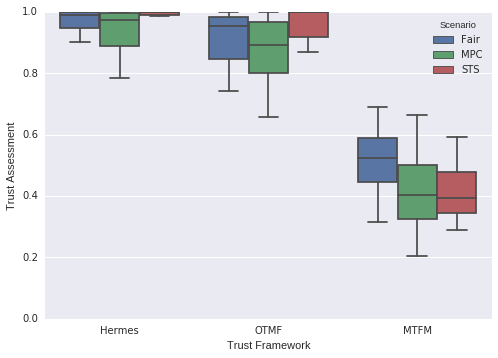

In [154]:
df=pd.DataFrame.from_dict(Tools.tuplify_multi_dict(inverted_results))
_boxplot_kwargs = {
    # 'showmeans': False,
    # 'showbox': True,
    # 'widths': 0.6,
    # 'linewidth': 2,
    'showfliers': False,
    "whis": 1
}
fig,ax = plt.subplots(1,1)
df.index = df.index.droplevel('run')
df=df.reindex_axis(['Hermes','OTMF','MTFM'], axis=1, level=0)
mdf=pd.melt(df)
mdf.columns = ['Trust Framework', 'Scenario', 'Trust Assessment']
sns.boxplot(data=mdf,x='Trust Framework', y='Trust Assessment', hue='Scenario', ax=ax, **_boxplot_kwargs)
ax.set_ylim(0,1)

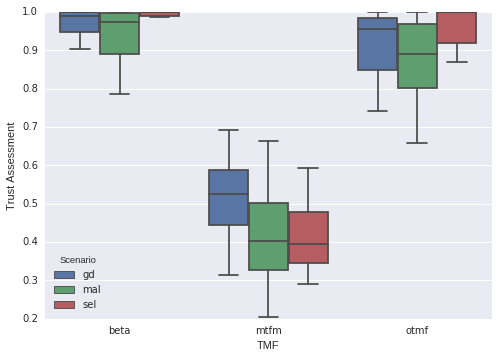

In [117]:
df.mtfm.describe()

,gd,mal,sel
count,29.000000,29.000000,29.000000
mean,0.523095,0.420647,0.408592
std,0.103387,0.121330,0.110630
min,0.314795,0.203612,0.173758
25%,0.444837,0.326175,0.344880
50%,0.524156,0.402819,0.394253
75%,0.588706,0.500916,0.477325
max,0.748309,0.663969,0.637203


/home/bolster/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x7f909be0e250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f909be18190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f909be25490>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f909be18e10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f909be0e450>,
  <matplotlib.lines.Line2D at 0x7f909bd97390>]}

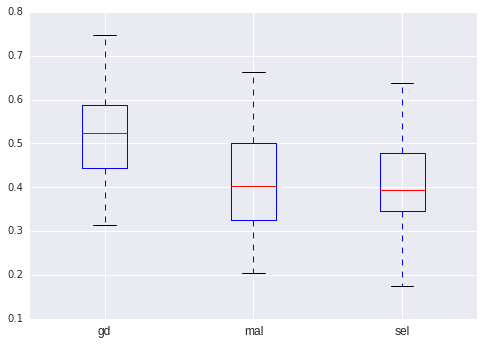

In [100]:
df['mtfm'].boxplot()

gd     Axes(0.125,0.125;0.775x0.775)
mal    Axes(0.125,0.125;0.775x0.775)
sel    Axes(0.125,0.125;0.775x0.775)
dtype: object

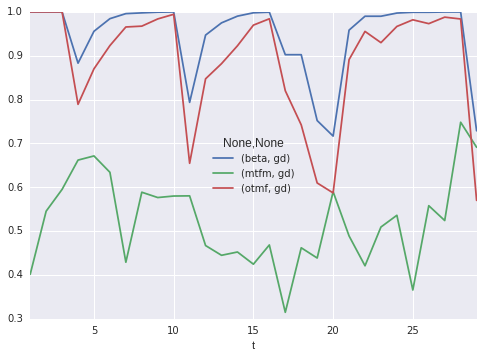

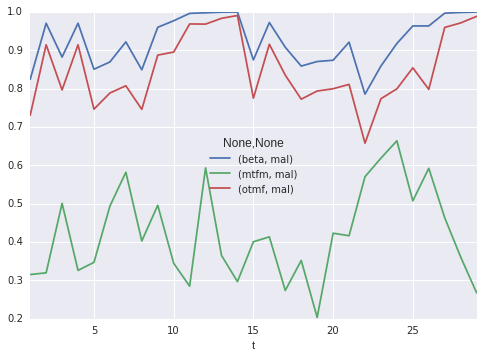

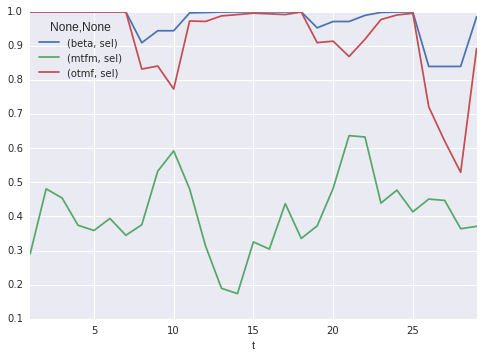

In [186]:
def true_positive_assessment_table(inverted_results, subset_reindex_keys):
    perfd = defaultdict()
    for subset_str, results in inverted_results.items():
        _rd = {k: v for k, v in results}
        _df = pd.concat([v for _, v in _rd.items()], keys=_rd.keys(), names=['bev', 'var', 't'])
        df_mean = _df.groupby(level='bev').agg(np.nanmean)
        # Take the mean of mean trust values from all other nodes and subtract suspicious node
        perfd[subset_str] = df_mean.drop(target, axis=1).apply(np.nanmean, axis=1) - df_mean[target]
    perf_df = pd.concat([v for _, v in perfd.items()], keys=perfd.keys(), names=['subset', 'bev']) \
        .unstack('bev').reindex(subset_reindex_keys)
    perf_df['Avg.'] = perf_df.mean(axis=1)
    perf_df = perf_df.append(pd.Series(perf_df.mean(axis=0), name='Avg.'))
    perf_df = perf_df.rename(subset_renamer)
    tex = perf_df.to_latex(float_format=lambda x: "{0:1.2f}".format(x), index=True, column_format="|l|*{4}{c}|r|") \
        .replace('bev', '\diagbox{Domain}{Behaviour}') \
        .split('\n')
    tex.pop(3)  # second dimension header; overridden by the above replacement
    tex.insert(-4, '\hline')  # Hline before averages
    tex = '\n'.join(tex)
    with open('input/domain_deltas.tex', 'w') as f:
        f.write(tex)

inverted_results = Tools.uncpickle("/dev/shm/inverted_results")
subset_reindex_key = Tools.uncpickle("/dev/shm/subset_reindex_keys")


In [187]:
perfd = Tools.defaultdict()
for subset_str, results in inverted_results.items():
    _rd = {k: v for k, v in results}
    print subset_str
    _df = pd.concat([v for _, v in _rd.items()], keys=_rd.keys(), names=['bev', 'var', 'run', 'observer' 't'])
    df_mean = _df.groupby(level='bev').agg(np.nanmean)
    # Take the mean of mean trust values from all other nodes and subtract suspicious node
    perfd[subset_str] = df_mean.drop(target, axis=1).apply(np.nanmean, axis=1) - df_mean[target]
perf_df = pd.concat([v for _, v in perfd.items()], keys=perfd.keys(), names=['subset', 'bev']) \
    .unstack('bev').reindex(subset_reindex_keys)
perf_df['Avg.'] = perf_df.mean(axis=1)
perf_df = perf_df.append(pd.Series(perf_df.mean(axis=0), name='Avg.'))
perf_df = perf_df.rename(subset_renamer)
tex = perf_df.to_latex(float_format=lambda x: "{0:1.2f}".format(x), index=True, column_format="|l|*{4}{c}|r|") \
    .replace('bev', '\diagbox{Domain}{Behaviour}') \
    .split('\n')
tex.pop(3)  # second dimension header; overridden by the above replacement
tex.insert(-4, '\hline')  # Hline before averages
tex = '\n'.join(tex)


phys_alt


ValueError: Length of names must match number of levels in MultiIndex.

In [189]:
for subset_str, results in inverted_results.items():
    _rd = {k: v for k, v in results}
    _df = pd.concat([v for _, v in _rd.items()], keys=_rd.keys())
    _df_alt = pd.concat([v for _, v in _rd.items()], keys=_rd.keys(), names=['bev', 'var', 'run', 'observer' 't'])


ValueError: Length of names must match number of levels in MultiIndex.

In [190]:
_df

target                          Alfa     Bravo   Charlie     Delta      Echo  \
       var run observer t                                                      
Shadow 0   0   Alfa     1        NaN  0.951494  0.084395  0.901855  0.220668   
                        2        NaN  0.603988  0.887964  0.987791  0.981087   
                        3        NaN  0.329130  0.865238  0.986351  0.120164   
                        4        NaN  0.905450  0.077375  0.116969  0.707063   
                        5        NaN  0.863746  0.083287  0.814715  0.978314   
                        6        NaN  0.332594  0.139376  0.008548  0.933331   
                        7        NaN  0.712115  0.961546  0.960378  0.780032   
                        8        NaN  0.874591  0.026474  0.856623  0.437430   
                        9        NaN  0.959440  0.303664  0.948574  0.046647   
                        10       NaN  0.946949  0.149293  0.935057  0.152500   
                        11       NaN  0.863899  0.006141  0.967750  0.262214   
                        12       NaN  0.866256  0.985518  0.393995  0.801738   
                        13       NaN  0.597990  0.992295  0.596682  0.963714   
                        14       NaN  0.262401  0.693445  0.873506  0.071550   
                        15       NaN  0.002081  0.977923  0.697989  0.987713   
                        16       NaN  0.028230  0.916644  0.231747  0.884057   
                        17       NaN  0.037101  0.925878  0.088362  0.450662   
                        18       NaN  0.066299  0.027597  0.995946  0.072028   
                        19       NaN  0.013652  0.947218  0.394419  0.918382   
                        20       NaN  0.671024  0.981455  0.955653  0.736495   
                        21       NaN  0.191671  0.989545  0.509198  0.111062   
                        22       NaN  0.030441  0.972208  0.568349  0.988298   
                        23       NaN  0.182198  0.956586  0.376341  0.093629   
                        24       NaN  0.379827  0.559693  0.996423  0.026373   
                        25       NaN  0.745844  0.023657  0.950337  0.079899   
                        26       NaN  0.855992  0.955132  0.181755  0.145506   
                        27       NaN  0.291102  0.951628  0.877372  0.375477   
                        28       NaN  0.031455  0.094781  0.970293  0.097620   
                        29       NaN  0.495541  0.884376  0.992273  0.011073   
                        30       NaN  0.021773  0.964474  0.177468  0.140907   
...                              ...       ...       ...       ...       ...   
STS    0   2   Foxtrot  30  0.644095  0.476092  0.806354  0.745749  0.134862   
                        31  0.737116  0.659083  0.020353  0.605026  0.891524   
                        32       NaN  0.430908  0.086172  0.266119  0.474194   
                        33  0.364413  0.031681  0.943294  0.761950  0.353114   
                        34  0.999375  0.003636  0.390628  0.900238  0.481596   
                        35  0.509660  0.236114  0.788376  0.961478  0.000630   
                        36       NaN  0.268410  0.911034  0.127334  0.080268   
                        37  0.170186  0.008525  0.527690  0.945826  0.040974   
                        38  0.046711  0.024950  1.000000  0.069850  0.081117   
                        39  0.038898  0.411352  0.716410  0.231344  0.105766   
                        40  0.368005  0.726182  0.592701  0.106826  0.638848   
                        41  0.983224  0.099837  0.378340  0.913400  0.160748   
                        42  0.480310  0.650892  0.339198  0.997161  0.013177   
                        43       NaN  0.039836  0.664472  0.957291  0.790160   
                        44  0.293672  0.194956  0.641858       NaN  0.871420   
                        45  0.822714  0.001965  0.681016  0.852043  0.734945   
                        46  0.317439  0.947443  0.308884  0.267740  0.615100   


In [185]:
_df

target                          Alfa     Bravo   Charlie     Delta      Echo  \
       var run observer t                                                      
Shadow 0   0   Alfa     1        NaN  0.951494  0.084395  0.901855  0.220668   
                        2        NaN  0.603988  0.887964  0.987791  0.981087   
                        3        NaN  0.329130  0.865238  0.986351  0.120164   
                        4        NaN  0.905450  0.077375  0.116969  0.707063   
                        5        NaN  0.863746  0.083287  0.814715  0.978314   
                        6        NaN  0.332594  0.139376  0.008548  0.933331   
                        7        NaN  0.712115  0.961546  0.960378  0.780032   
                        8        NaN  0.874591  0.026474  0.856623  0.437430   
                        9        NaN  0.959440  0.303664  0.948574  0.046647   
                        10       NaN  0.946949  0.149293  0.935057  0.152500   
                        11       NaN  0.863899  0.006141  0.967750  0.262214   
                        12       NaN  0.866256  0.985518  0.393995  0.801738   
                        13       NaN  0.597990  0.992295  0.596682  0.963714   
                        14       NaN  0.262401  0.693445  0.873506  0.071550   
                        15       NaN  0.002081  0.977923  0.697989  0.987713   
                        16       NaN  0.028230  0.916644  0.231747  0.884057   
                        17       NaN  0.037101  0.925878  0.088362  0.450662   
                        18       NaN  0.066299  0.027597  0.995946  0.072028   
                        19       NaN  0.013652  0.947218  0.394419  0.918382   
                        20       NaN  0.671024  0.981455  0.955653  0.736495   
                        21       NaN  0.191671  0.989545  0.509198  0.111062   
                        22       NaN  0.030441  0.972208  0.568349  0.988298   
                        23       NaN  0.182198  0.956586  0.376341  0.093629   
                        24       NaN  0.379827  0.559693  0.996423  0.026373   
                        25       NaN  0.745844  0.023657  0.950337  0.079899   
                        26       NaN  0.855992  0.955132  0.181755  0.145506   
                        27       NaN  0.291102  0.951628  0.877372  0.375477   
                        28       NaN  0.031455  0.094781  0.970293  0.097620   
                        29       NaN  0.495541  0.884376  0.992273  0.011073   
                        30       NaN  0.021773  0.964474  0.177468  0.140907   
...                              ...       ...       ...       ...       ...   
STS    0   2   Foxtrot  30  0.644095  0.476092  0.806354  0.745749  0.134862   
                        31  0.737116  0.659083  0.020353  0.605026  0.891524   
                        32       NaN  0.430908  0.086172  0.266119  0.474194   
                        33  0.364413  0.031681  0.943294  0.761950  0.353114   
                        34  0.999375  0.003636  0.390628  0.900238  0.481596   
                        35  0.509660  0.236114  0.788376  0.961478  0.000630   
                        36       NaN  0.268410  0.911034  0.127334  0.080268   
                        37  0.170186  0.008525  0.527690  0.945826  0.040974   
                        38  0.046711  0.024950  1.000000  0.069850  0.081117   
                        39  0.038898  0.411352  0.716410  0.231344  0.105766   
                        40  0.368005  0.726182  0.592701  0.106826  0.638848   
                        41  0.983224  0.099837  0.378340  0.913400  0.160748   
                        42  0.480310  0.650892  0.339198  0.997161  0.013177   
                        43       NaN  0.039836  0.664472  0.957291  0.790160   
                        44  0.293672  0.194956  0.641858       NaN  0.871420   
                        45  0.822714  0.001965  0.681016  0.852043  0.734945   
                        46  0.317439  0.947443  0.308884  0.267740  0.615100   


In [178]:
_df = pd.concat([v for _, v in _rd.items()], keys=_rd.keys(), names=['bev', 'var', 'run', 'observer' 't'])


ValueError: Length of names must match number of levels in MultiIndex.